In [1]:
import pandas as pd
import numpy as np

In [2]:
import h2o
from h2o.automl import H2OAutoML

In [3]:
from h2o.estimators import H2OTargetEncoderEstimator

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /Users/tigran/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/sy/xqrmw1m17pg7h55m5gctnpqm0000gn/T/tmpnilzu256
  JVM stdout: /var/folders/sy/xqrmw1m17pg7h55m5gctnpqm0000gn/T/tmpnilzu256/h2o_tigran_started_from_python.out
  JVM stderr: /var/folders/sy/xqrmw1m17pg7h55m5gctnpqm0000gn/T/tmpnilzu256/h2o_tigran_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_tigran_19ey66
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
train = h2o.import_file("train.csv")
test = h2o.import_file("test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
train

Id,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
1,5,2.1002e+08,198,балкон,1,2,,вторичка,,Сокол,САО
2,2,1.763e+07,64,,3,8,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
3,5,1.424e+08,161,балкон,7,7,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
4,5,1.4252e+08,265,,5,5,кирпичный,вторичка,,Басманный,ЦАО
5,3,3.407e+07,88,,10,42,монолитный,вторичка,грузовой,Хорошевский,САО
6,1,7.66e+06,35,балкон,9,10,,вторичка,пассажирский,Академический,ЮЗАО
7,5,6.309e+07,161,,3,6,кирпичный,вторичка,пассажирский,Красносельский,ЦАО
8,5,2.2863e+08,295,балкон,4,6,,вторичка,грузовой,Раменки,ЗАО
9,5,6.828e+07,311,,14,20,,вторичка,грузовой,Можайский,ЗАО
10,5,4.703e+07,118,балкон,3,6,,вторичка,пассажирский,Хамовники,ЦАО


In [7]:
temp = train["Price"].as_data_frame()
temp = np.log1p(temp)
temp = h2o.H2OFrame(temp)
train["Price"] = temp

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
train["FE"] = train["Floor"] / train["FloorsTotal"]

In [10]:
test["FE"] = test["Floor"] / test["FloorsTotal"]

In [12]:
train.types

{'Id': 'int',
 'Room': 'int',
 'Price': 'real',
 'Size': 'int',
 'Balcony': 'enum',
 'Floor': 'int',
 'FloorsTotal': 'int',
 'Walls': 'enum',
 'Age': 'enum',
 'Lift': 'enum',
 'District': 'enum',
 'Okrug': 'enum',
 'FE': 'int'}

In [13]:
predictors = train.names

In [14]:
predictors.remove("Price")
predictors.remove("Id")

In [43]:
# predictors.remove("Walls")
# predictors.remove("Lift")
# predictors.remove('Balcony')

In [15]:
predictors

['Room',
 'Size',
 'Balcony',
 'Floor',
 'FloorsTotal',
 'Walls',
 'Age',
 'Lift',
 'District',
 'Okrug',
 'FE']

In [16]:
response = "Price" 

In [18]:
aml = H2OAutoML(max_models=15, seed=69, nfolds=5,
                verbosity="info", sort_metric="RMSE", exclude_algos = ["GLM", "DeepLearning"])

aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |
01:16:10.241: Project: AutoML_2_20230328_11610
01:16:10.245: Setting stopping tolerance adaptively based on the training frame: 0.004968549253316363
01:16:10.245: Build control seed: 69
01:16:10.248: training frame: Frame key: AutoML_2_20230328_11610_training_py_4_sid_be74    cols: 13    rows: 40508  chunks: 32    size: 1115940  checksum: 4346311668093655046
01:16:10.249: validation frame: NULL
01:16:10.249: leaderboard frame: NULL
01:16:10.249: blending frame: NULL
01:16:10.249: response column: Price
01:16:10.249: fold column: null
01:16:10.249: weights column: null
01:16:10.253: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid

key,value
Stacking strategy,cross_validation
Number of base models (used / total),13/15
# GBM base models (used / total),7/7
# XGBoost base models (used / total),5/6
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [19]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230328_11610,0.177859,0.031634,0.12154,0.00986795,0.031634
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_11610,0.179067,0.0320649,0.12191,0.00993898,0.0320649
GBM_4_AutoML_2_20230328_11610,0.181355,0.0328896,0.123624,0.010066,0.0328896
GBM_3_AutoML_2_20230328_11610,0.181729,0.0330254,0.124798,0.0100842,0.0330254
GBM_2_AutoML_2_20230328_11610,0.185387,0.0343685,0.12784,0.0102852,0.0343685
GBM_grid_1_AutoML_2_20230328_11610_model_2,0.185812,0.0345259,0.124941,0.0103019,0.0345259
GBM_grid_1_AutoML_2_20230328_11610_model_1,0.186447,0.0347624,0.128144,0.0103305,0.0347624
XGBoost_grid_1_AutoML_2_20230328_11610_model_3,0.187308,0.0350844,0.128916,0.0104003,0.0350844
GBM_5_AutoML_2_20230328_11610,0.188163,0.0354053,0.129952,0.0104358,0.0354053
GBM_1_AutoML_2_20230328_11610,0.189006,0.0357232,0.129623,0.0104539,0.0357232


In [20]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230328_11610,0.177859,0.031634,0.12154,0.00986795,0.031634
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_11610,0.179067,0.0320649,0.12191,0.00993898,0.0320649
GBM_4_AutoML_2_20230328_11610,0.181355,0.0328896,0.123624,0.010066,0.0328896
GBM_3_AutoML_2_20230328_11610,0.181729,0.0330254,0.124798,0.0100842,0.0330254
GBM_2_AutoML_2_20230328_11610,0.185387,0.0343685,0.12784,0.0102852,0.0343685
GBM_grid_1_AutoML_2_20230328_11610_model_2,0.185812,0.0345259,0.124941,0.0103019,0.0345259
GBM_grid_1_AutoML_2_20230328_11610_model_1,0.186447,0.0347624,0.128144,0.0103305,0.0347624
XGBoost_grid_1_AutoML_2_20230328_11610_model_3,0.187308,0.0350844,0.128916,0.0104003,0.0350844
GBM_5_AutoML_2_20230328_11610,0.188163,0.0354053,0.129952,0.0104358,0.0354053
GBM_1_AutoML_2_20230328_11610,0.189006,0.0357232,0.129623,0.0104539,0.0357232


In [21]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230328_11610,0.177859,0.031634,0.12154,0.00986795,0.031634
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_11610,0.179067,0.0320649,0.12191,0.00993898,0.0320649
GBM_4_AutoML_2_20230328_11610,0.181355,0.0328896,0.123624,0.010066,0.0328896
GBM_3_AutoML_2_20230328_11610,0.181729,0.0330254,0.124798,0.0100842,0.0330254
GBM_2_AutoML_2_20230328_11610,0.185387,0.0343685,0.12784,0.0102852,0.0343685
GBM_grid_1_AutoML_2_20230328_11610_model_2,0.185812,0.0345259,0.124941,0.0103019,0.0345259
GBM_grid_1_AutoML_2_20230328_11610_model_1,0.186447,0.0347624,0.128144,0.0103305,0.0347624
XGBoost_grid_1_AutoML_2_20230328_11610_model_3,0.187308,0.0350844,0.128916,0.0104003,0.0350844
GBM_5_AutoML_2_20230328_11610,0.188163,0.0354053,0.129952,0.0104358,0.0354053
GBM_1_AutoML_2_20230328_11610,0.189006,0.0357232,0.129623,0.0104539,0.0357232


In [15]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmsle,rmse,mse,mae,mean_residual_deviance
DRF_1_AutoML_4_20230102_15227,0.214744,2.22513e+07,4.95119e+14,4.98802e+06,4.95119e+14
GBM_3_AutoML_4_20230102_15227,0.214899,2.13394e+07,4.55372e+14,5.23128e+06,4.55372e+14
GBM_2_AutoML_4_20230102_15227,0.219395,2.17143e+07,4.71509e+14,5.39582e+06,4.71509e+14
StackedEnsemble_AllModels_1_AutoML_4_20230102_15227,0.221435,2.0803e+07,4.32764e+14,5.31025e+06,4.32764e+14
GBM_5_AutoML_4_20230102_15227,0.22571,2.22595e+07,4.95483e+14,5.4938e+06,4.95483e+14
StackedEnsemble_BestOfFamily_1_AutoML_4_20230102_15227,0.225788,2.10144e+07,4.41604e+14,5.38547e+06,4.41604e+14
XRT_1_AutoML_4_20230102_15227,0.284986,2.30941e+07,5.33338e+14,6.04868e+06,5.33338e+14
DeepLearning_grid_3_AutoML_4_20230102_15227_model_1,0.399228,2.32401e+07,5.40103e+14,7.85685e+06,5.40103e+14
DeepLearning_grid_2_AutoML_4_20230102_15227_model_1,0.408292,2.24111e+07,5.02258e+14,7.78862e+06,5.02258e+14
GLM_1_AutoML_4_20230102_15227,1.06754,5.11821e+07,2.61961e+15,2.23124e+07,2.61961e+15


In [56]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_6_20230102_23328,2.06607e+07,4.26863e+14,4.82887e+06,0.19702,4.26863e+14
StackedEnsemble_BestOfFamily_1_AutoML_6_20230102_23328,2.08645e+07,4.35327e+14,5.05776e+06,0.208314,4.35327e+14
GBM_4_AutoML_6_20230102_23328,2.12607e+07,4.52019e+14,5.04251e+06,nan,4.52019e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_7,2.14005e+07,4.57983e+14,5.58861e+06,nan,4.57983e+14
GBM_3_AutoML_6_20230102_23328,2.14264e+07,4.59092e+14,5.23442e+06,nan,4.59092e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_2,2.14809e+07,4.61428e+14,5.28181e+06,nan,4.61428e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_8,2.17816e+07,4.74439e+14,4.93458e+06,0.203688,4.74439e+14
GBM_grid_1_AutoML_6_20230102_23328_model_8,2.17988e+07,4.75188e+14,4.87667e+06,nan,4.75188e+14
XGBoost_grid_1_AutoML_6_20230102_23328_model_1,2.2101e+07,4.88456e+14,5.85967e+06,nan,4.88456e+14
GBM_5_AutoML_6_20230102_23328,2.2189e+07,4.9235e+14,5.46459e+06,nan,4.9235e+14


In [100]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmsle,rmse,mse,mae,mean_residual_deviance
XGBoost_grid_1_AutoML_8_20230102_31825_model_8,0.209153,2.33608e+07,5.45729e+14,4.96479e+06,5.45729e+14
StackedEnsemble_BestOfFamily_1_AutoML_8_20230102_31825,0.234047,2.12739e+07,4.52579e+14,5.28066e+06,4.52579e+14
GBM_5_AutoML_8_20230102_31825,0.245305,2.22426e+07,4.94734e+14,5.84691e+06,4.94734e+14
XRT_1_AutoML_8_20230102_31825,0.26383,2.26995e+07,5.15266e+14,5.66265e+06,5.15266e+14
DRF_1_AutoML_8_20230102_31825,0.265153,2.23839e+07,5.0104e+14,5.52968e+06,5.0104e+14
GBM_grid_1_AutoML_8_20230102_31825_model_7,0.331816,2.47969e+07,6.14886e+14,7.32078e+06,6.14886e+14
GBM_grid_1_AutoML_8_20230102_31825_model_2,nan,2.31358e+07,5.35265e+14,6.52705e+06,5.35265e+14
XGBoost_grid_1_AutoML_8_20230102_31825_model_3,nan,2.24319e+07,5.0319e+14,5.96963e+06,5.0319e+14
GBM_grid_1_AutoML_8_20230102_31825_model_4,nan,2.38242e+07,5.67594e+14,6.15904e+06,5.67594e+14
GBM_grid_1_AutoML_8_20230102_31825_model_1,nan,2.35141e+07,5.52914e+14,6.12921e+06,5.52914e+14


In [22]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),13/15
# GBM base models (used / total),7/7
# XGBoost base models (used / total),5/6
# DRF base models (used / total),1/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [23]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [25]:
preds2 = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_2_20230328_11610").predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [26]:
preds = preds2

In [28]:
answer = h2o.import_file("sample_submission.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
temp = preds["predict"]

In [30]:
temp = temp.as_data_frame()
temp = np.expm1(temp)
temp = h2o.H2OFrame(temp)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
answer["Price"] = temp

In [32]:
answer["Price"] = answer["Price"] + 1

In [33]:
h2o.export_file(answer, path = "preds_all_log1.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20230328_11610_model_2,0.0823057,0.00677422,0.0588914,0.00468476,0.00677422,4201,0.01046,GBM
StackedEnsemble_BestOfFamily_1_AutoML_2_20230328_11610,0.106615,0.0113667,0.0759332,0.00600311,0.0113667,4255,0.030092,StackedEnsemble
GBM_4_AutoML_2_20230328_11610,0.111401,0.0124102,0.0792379,0.00628026,0.0124102,2569,0.011461,GBM
DRF_1_AutoML_2_20230328_11610,0.114713,0.0131591,0.0770142,0.00635633,0.0131591,9345,0.006859,DRF
StackedEnsemble_AllModels_1_AutoML_2_20230328_11610,0.117278,0.0137541,0.083934,0.00660353,0.0137541,5069,0.123017,StackedEnsemble
XGBoost_1_AutoML_2_20230328_11610,0.118354,0.0140076,0.0870158,0.00671645,0.0140076,6725,0.002309,XGBoost
XGBoost_2_AutoML_2_20230328_11610,0.118632,0.0140735,0.0866666,0.00671906,0.0140735,7278,0.002548,XGBoost
XGBoost_grid_1_AutoML_2_20230328_11610_model_3,0.119589,0.0143016,0.0854785,0.00674461,0.0143016,12199,0.003415,XGBoost
GBM_3_AutoML_2_20230328_11610,0.130215,0.016956,0.0928709,0.00732446,0.016956,2163,0.015265,GBM
GBM_grid_1_AutoML_2_20230328_11610_model_1,0.141084,0.0199048,0.0990533,0.00787277,0.0199048,2749,0.013419,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

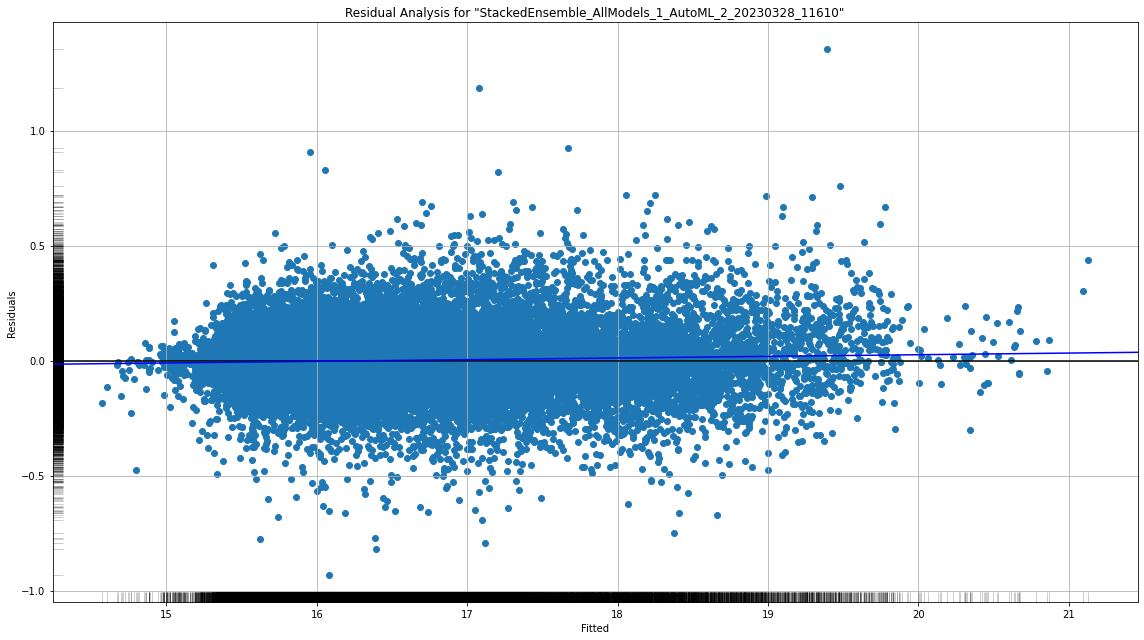

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

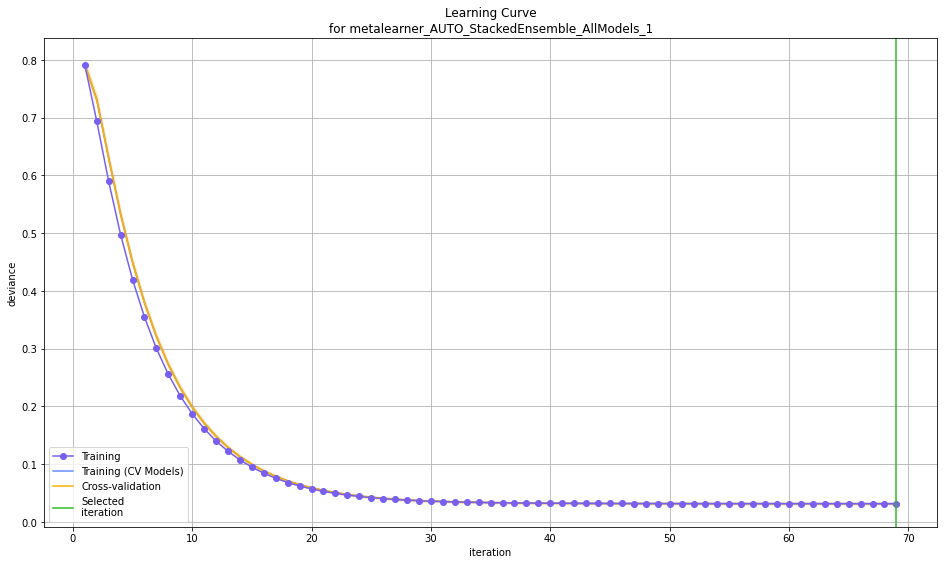

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

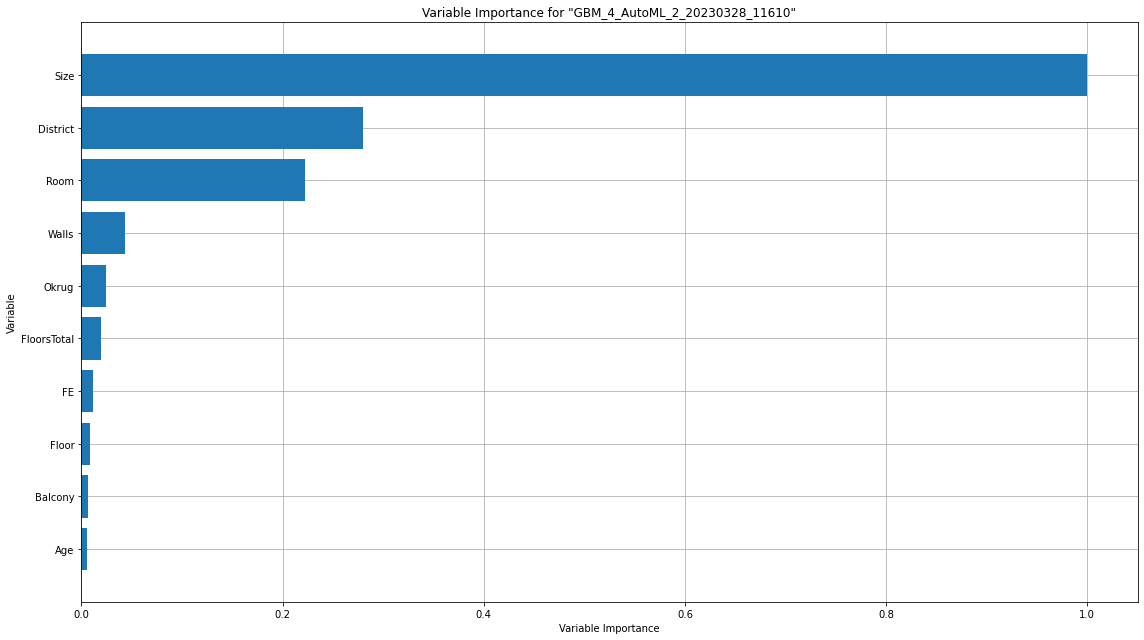

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

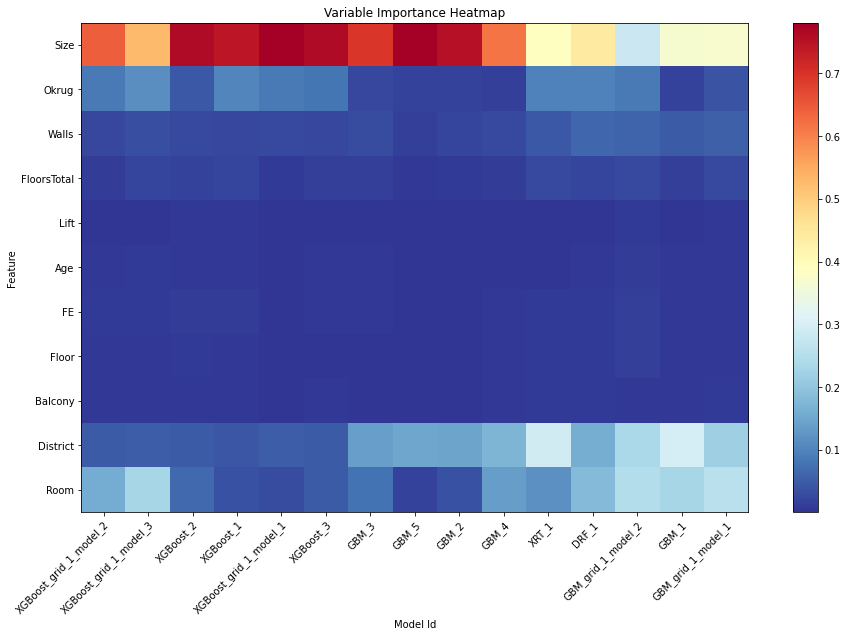

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

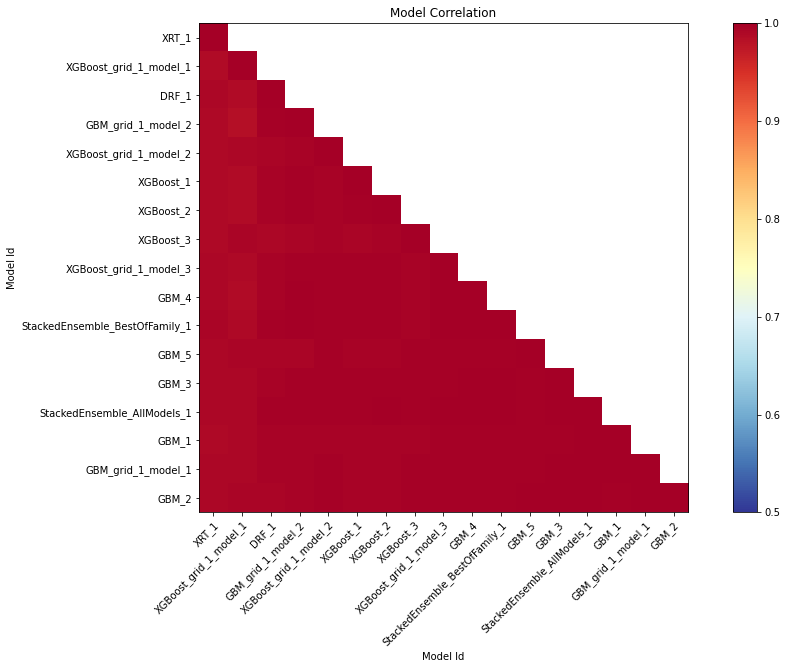

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

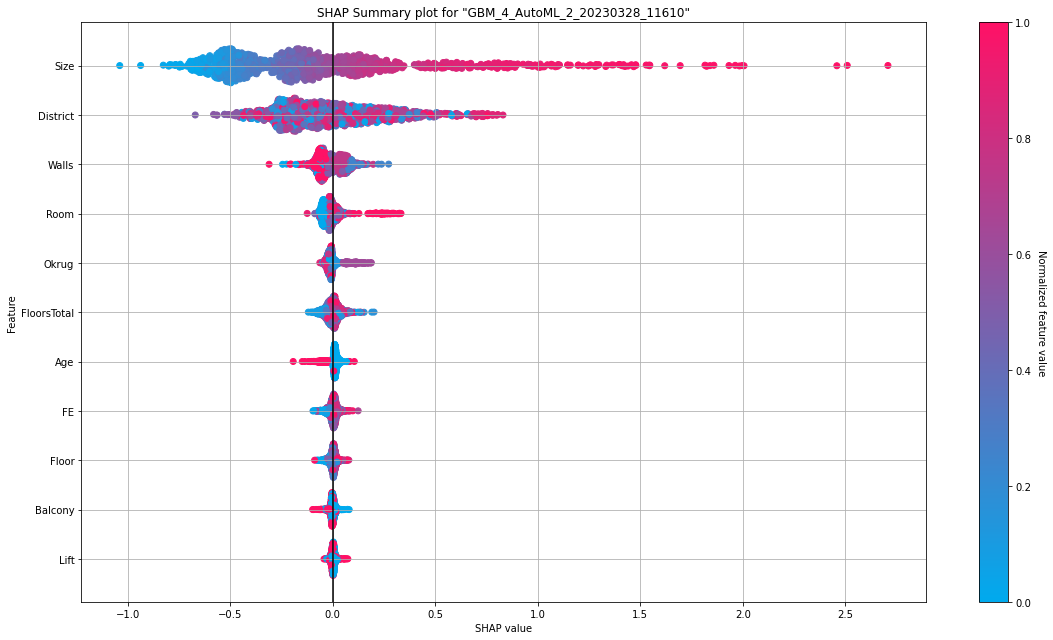

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

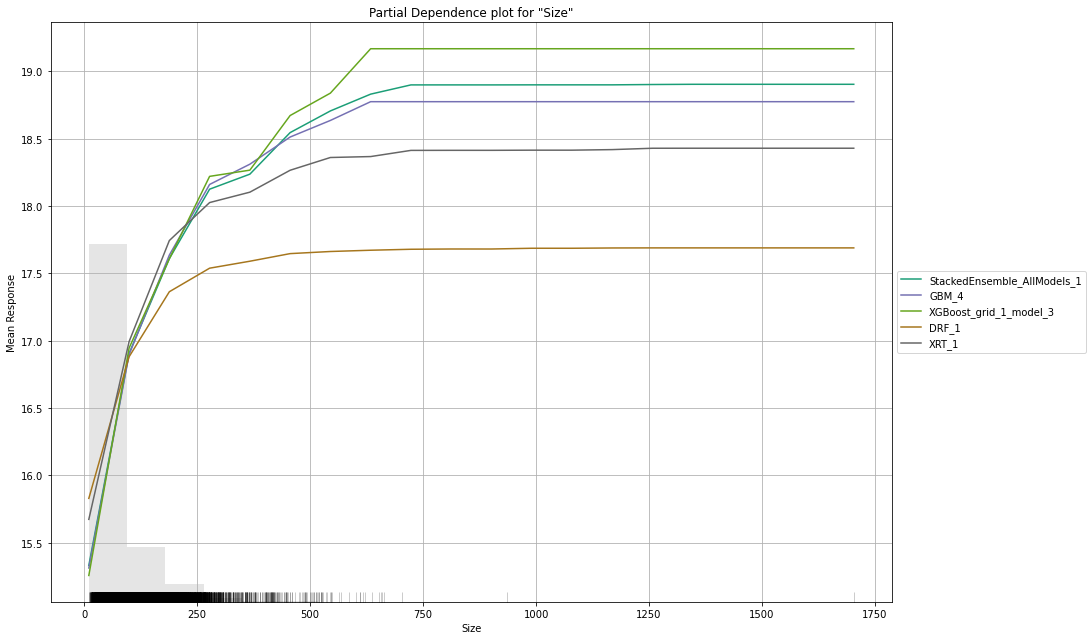

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9735155d07894dd6a3643569a3c54137> was cancelled by the user.

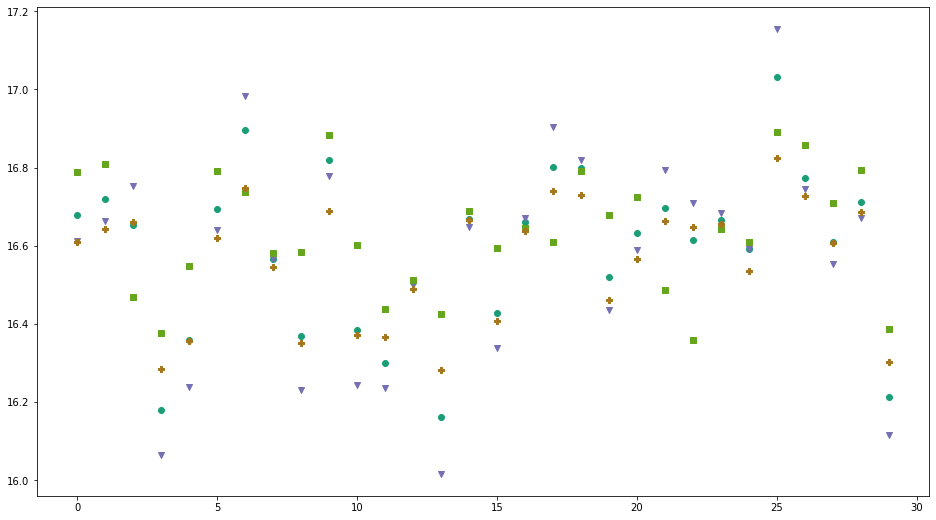

In [34]:
aml.explain(train)